# Источники:
- Building powerful image classification models using very little data

  https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

- Image Preprocessing

  https://keras.io/preprocessing/image/

- Аугментация (augmentation, “раздутие”) данных для обучения нейронной сети на примере печатных символов
  https://habr.com/ru/company/smartengines/blog/264677/

- COLABORATORY. РАБОТАЕМ С ЛОКАЛЬНОЙ ФАЙЛОВОЙ СИСТЕМОЙ ВАШЕГО КОМПЬЮТЕРА И GOOGLE ДИСКОМ

  https://mirrobo.ru/pilot/colaboratory-rabotaem-s-lokalnoj-fajlovoj-sistemoj-vashego-kompjutera/
- Шпаргалка по архиватору zip

  https://www.oslogic.ru/knowledge/473/shpargalka-po-arhivatoru-zip/


###Цель:
Увеличить количество изображений в датасете для распознавания подписей и текста за счет применения аугментации

###Загрузка содержания гугл-диска

In [ ]:
# загрузка содержания Google диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# скопируем файлы с Google диска
!cp '/content/drive/MyDrive/SignsTexts/Text.zip' Text.zip
!cp '/content/drive/MyDrive/SignsTexts/Signs.zip' Signs.zip

In [ ]:
!ls

drive  sample_data  Signs.zip  Text.zip


###ImageDataGenerator

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

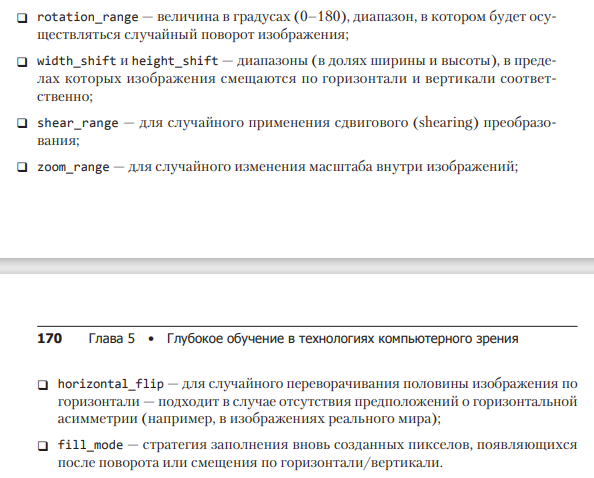

Источник: Ф. Шолле, 5.2.5. Расширение данных, с. 169

###Создадим директорию для размещения аугментированных данных

In [ ]:
!mkdir Aug_data

In [ ]:
!ls

Aug_data  drive  sample_data  Signs.zip  Text.zip


###Распакуем архивы с изображениями

In [ ]:
!unzip Signs.zip

Archive:  Signs.zip
  inflating: podpis2.jpg             
  inflating: podpis3.jpg             
  inflating: podpis1.jpg             


In [ ]:
!unzip Text.zip

Archive:  Text.zip
  inflating: text1.jpg               
  inflating: text2.jpg               
  inflating: text3.jpg               


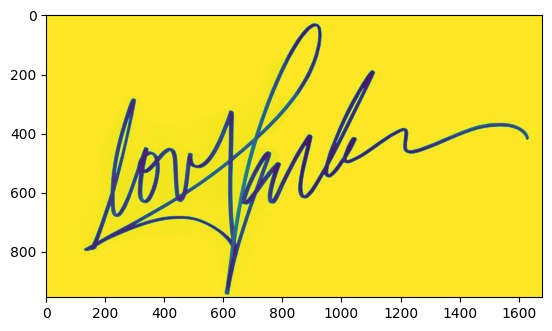

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
img_1 = Image.open('/content/podpis1.jpg')
plt.imshow(img_1)
plt.show()

In [ ]:
img_1 = load_img('/content/podpis1.jpg')  # это изображение PIL image
x_1 = img_to_array(img_1)  # это массив Numpy размерностью (y = rows, x = columns, число каналов цвета = 1/3/4)
x_1.shape

(955, 1680, 3)

###Генерация одного изображения

In [ ]:
# генерация с одного изображения
img = load_img('/content/podpis2.jpg')  # это изображение PIL image
x = img_to_array(img)  # это массив Numpy размерностью (y, x, 3)
x = x.reshape((1,) + x.shape)  # изменение размерности массива Numpy на (1, 3, y, x)

# the .flow() генерирует изображения, преобразованные случайным образом
# и сохраняет результаты в директорию `Aug_data/`
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/Aug_data', save_prefix='K', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # для досрочного выхода из цикла по достижении заданного количества изображений

Откройте для проверки изображений директорию Aug_data (см. слева опция Files).

###Функция для генерации изображений

In [ ]:
def generating_pictures(img, save_prefix):
  x = img_to_array(img)  # это массив Numpy размерностью (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # изменение размерности массива Numpy на (1, 3, 150, 150)

  # the .flow() генерирует изображения, преобразованные случайным образом
  # и сохраняет результаты в директорию `preview/`
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/Aug_data', save_prefix=save_prefix, save_format='jpeg'):
      i += 1
      if i > 20:
          break  # досрочный выход из цикла - при достижении заданного количества изображений

###Демонстрация вызова функции для изображений подписи и текста

In [ ]:
img = load_img('/content/podpis1.jpg')  # это изображение подписи
save_prefix='S_sign'
# вызов функции
generating_pictures(img, save_prefix)

In [ ]:
img = load_img('/content/podpis3.jpg')  # это изображение  подписи другого автора
save_prefix='V_sign'
# вызов функции
generating_pictures(img, save_prefix)

Откройте для проверки изображений директорию Aug_data (см. слева опция Files).

###Создадим словарь для всех данных: путь к файлу и префикс для нового файла

####Для файлов с подписью

In [ ]:
path_img = ['/content/podpis2.jpg', '/content/podpis1.jpg', '/content/podpis3.jpg']
list_save_prefix = ['K_sign', 'S_sign', 'V_sign']
# c помощью функции zip()
dict_img = dict(zip(path_img, list_save_prefix))

In [ ]:
dict_img

{'/content/podpis2.jpg': 'K_sign',
 '/content/podpis1.jpg': 'S_sign',
 '/content/podpis3.jpg': 'V_sign'}

####Для файлов с текстом

In [ ]:
path_txt = ['/content/text1.jpg', '/content/text2.jpg', '/content/text3.jpg']
list_save_prefix_txt = 'txt_st'
# с помощью метода fromkeys
dict_txt = dict.fromkeys(path_txt, list_save_prefix_txt)

In [ ]:
dict_txt

{'/content/text1.jpg': 'txt_st',
 '/content/text2.jpg': 'txt_st',
 '/content/text3.jpg': 'txt_st'}

###Генерация изображений

In [ ]:
for key, value in dict_img.items():
  img = load_img(key)  # это изображение  подписи
  save_prefix= value
  # вызов функции
  generating_pictures(img, save_prefix)

In [ ]:
for key, value in dict_txt.items():
  img = load_img(key)  # это изображение  текста
  save_prefix= value
  # вызов функции
  generating_pictures(img, save_prefix)

###Действия с директорией Aug_data

In [ ]:
# подсчитаем количество файлов в директории Aug_data
!find ./Aug_data -type f| wc -l

189


In [ ]:
# посмотрим на содержимое директории
import os
print(os.listdir('./Aug_data'))

['txt_st_0_8367.jpeg', 'txt_st_0_8124.jpeg', 'S_sign_0_1222.jpeg', 'txt_st_0_5950.jpeg', 'S_sign_0_1354.jpeg', 'S_sign_0_1374.jpeg', 'K_sign_0_6463.jpeg', 'K_sign_0_2490.jpeg', 'K_0_8348.jpeg', 'V_sign_0_7116.jpeg', 'V_sign_0_7671.jpeg', 'V_sign_0_4117.jpeg', 'V_sign_0_3717.jpeg', 'txt_st_0_9864.jpeg', 'txt_st_0_6130.jpeg', 'S_sign_0_5744.jpeg', 'S_sign_0_1395.jpeg', 'V_sign_0_1884.jpeg', 'K_sign_0_7128.jpeg', 'V_sign_0_8781.jpeg', 'V_sign_0_4680.jpeg', 'txt_st_0_179.jpeg', 'S_sign_0_4572.jpeg', 'V_sign_0_6465.jpeg', 'V_sign_0_2898.jpeg', 'txt_st_0_2016.jpeg', 'V_sign_0_5138.jpeg', 'txt_st_0_8781.jpeg', 'K_0_4347.jpeg', 'V_sign_0_6820.jpeg', 'txt_st_0_989.jpeg', 'txt_st_0_3806.jpeg', 'K_0_7438.jpeg', 'V_sign_0_3395.jpeg', 'txt_st_0_9398.jpeg', 'txt_st_0_4064.jpeg', 'txt_st_0_2159.jpeg', 'K_sign_0_3400.jpeg', 'V_sign_0_3881.jpeg', 'V_sign_0_910.jpeg', 'V_sign_0_1648.jpeg', 'V_sign_0_9072.jpeg', 'S_sign_0_7271.jpeg', 'S_sign_0_5440.jpeg', 'K_0_1288.jpeg', 'K_0_2174.jpeg', 'txt_st_0_5676.

In [ ]:
# упакуем директорию в архив zip (сжатие от 1 до 9)
!zip -r -9 archive_aug.zip /content/Aug_data/*

  adding: content/Aug_data/K_0_1034.jpeg (deflated 27%)
  adding: content/Aug_data/K_0_1055.jpeg (deflated 36%)
  adding: content/Aug_data/K_0_1288.jpeg (deflated 28%)
  adding: content/Aug_data/K_0_2049.jpeg (deflated 30%)
  adding: content/Aug_data/K_0_2174.jpeg (deflated 22%)
  adding: content/Aug_data/K_0_2824.jpeg (deflated 23%)
  adding: content/Aug_data/K_0_3260.jpeg (deflated 20%)
  adding: content/Aug_data/K_0_4178.jpeg (deflated 27%)
  adding: content/Aug_data/K_0_4347.jpeg (deflated 23%)
  adding: content/Aug_data/K_0_4699.jpeg (deflated 29%)
  adding: content/Aug_data/K_0_4704.jpeg (deflated 22%)
  adding: content/Aug_data/K_0_5917.jpeg (deflated 24%)
  adding: content/Aug_data/K_0_7121.jpeg (deflated 23%)
  adding: content/Aug_data/K_0_7257.jpeg (deflated 23%)
  adding: content/Aug_data/K_0_7438.jpeg (deflated 25%)
  adding: content/Aug_data/K_0_7495.jpeg (deflated 28%)
  adding: content/Aug_data/K_0_764.jpeg (deflated 24%)
  adding: content/Aug_data/K_0_8020.jpeg (deflate

In [ ]:
!ls

archive_aug.zip  drive	      podpis2.jpg  sample_data	text1.jpg  text3.jpg
Aug_data	 podpis1.jpg  podpis3.jpg  Signs.zip	text2.jpg  Text.zip


In [ ]:
# подгрузим модуль для работы с файлами
from google.colab import files

In [ ]:
# скачаем архив на локальный диск
files.download('archive_aug.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

![alt text](https://drive.google.com/uc?id=1pCPlQE-olBkBYHE6ih3CZilC-xpjSKuq)

In [ ]:
# скопируем архив на гугл диск
!cp '/content/archive_aug.zip' '/content/drive/MyDrive/SignsTexts'

###Задание:
- повторите блокнот с дополнением - создайте отдельную директорию для сохранения предварительных изображений;
- подумайте как автоматизитровать создание пути к файлу (см. подсказку в содержании занятия № 3-4);
- сформируйте блокнот для своих данных (удалите лишний код), сохраните архив с аугментированными данными на свой Гугл-диск.
